In [5]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os


path = kagglehub.dataset_download("mikhail1681/walmart-sales")
print(os.listdir(path))

['Walmart_Sales.csv']


In [7]:
file_path = os.path.join(path, 'Walmart_Sales.csv')
df = pd.read_csv(file_path)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [17]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Month'] = df['Date'].dt.month_name()
df['Weekday'] = df['Date'].dt.day_name()
df['Year'] = df['Date'].dt.year

In [19]:
print("📊 First few rows of the dataset:")
print(df.head())
print("\n🧼 Missing values:\n", df.isnull().sum())

📊 First few rows of the dataset:
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment     Month Weekday  Year  
0  211.096358         8.106  February  Friday  2010  
1  211.242170         8.106  February  Friday  2010  
2  211.289143         8.106  February  Friday  2010  
3  211.319643         8.106  February  Friday  2010  
4  211.350143         8.106     March  Friday  2010  

🧼 Missing values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
Week

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


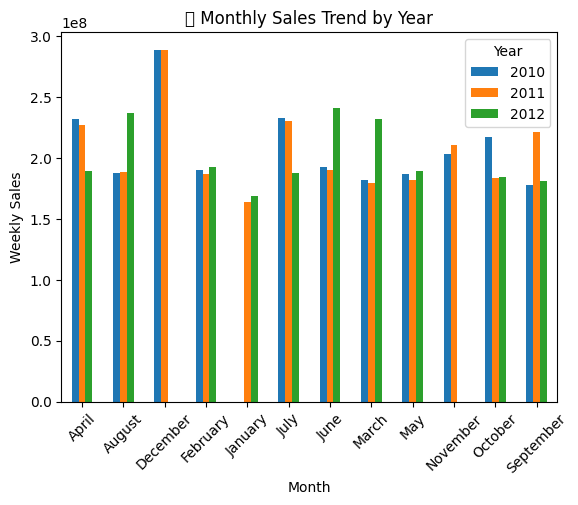

In [20]:
#Monthly Sales Trend
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum()
monthly_sales = monthly_sales.unstack().fillna(0)
monthly_sales.T.plot(kind='bar')
plt.title('📈 Monthly Sales Trend by Year')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


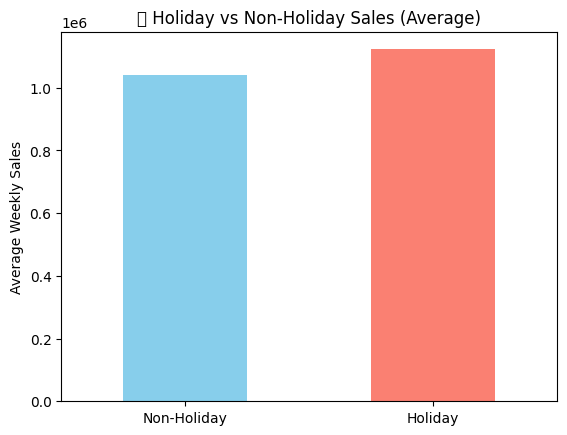

In [21]:
#Holiday vs Non-Holiday Sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_sales.index = ['Non-Holiday', 'Holiday']
holiday_sales.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('🎉 Holiday vs Non-Holiday Sales (Average)')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


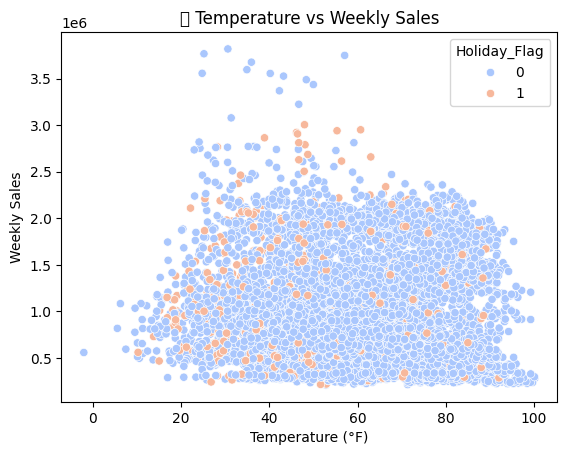

In [22]:
 #Temperature vs Weekly Sales
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Holiday_Flag', palette='coolwarm')
plt.title('🌡️ Temperature vs Weekly Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9981 (\N{FUEL PUMP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


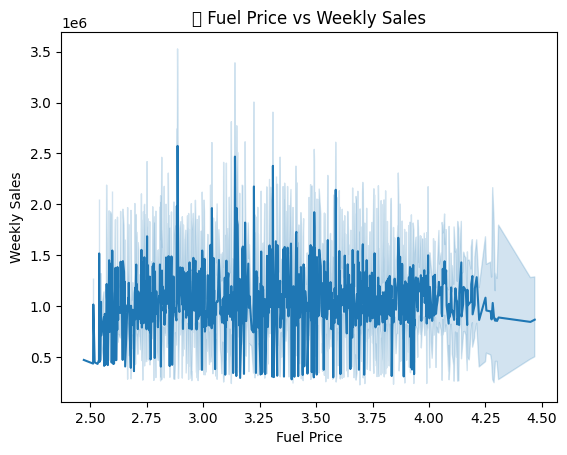

In [23]:
#Fuel Price vs Weekly Sales
sns.lineplot(data=df.sort_values('Date'), x='Fuel_Price', y='Weekly_Sales')
plt.title('⛽ Fuel Price vs Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()

/tmp/ipython-input-24-3605930289.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-3605930289.py:7: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


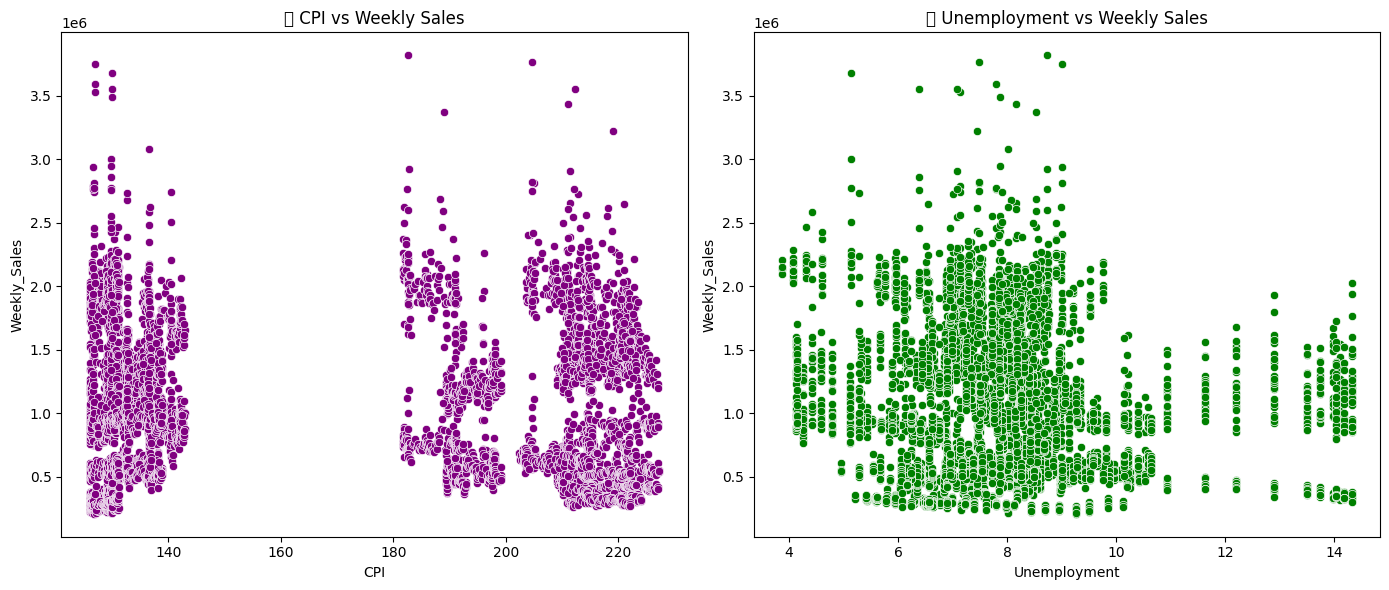

In [24]:
#CPI and Unemployment Impact
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', ax=ax[0], color='purple')
ax[0].set_title('📊 CPI vs Weekly Sales')
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', ax=ax[1], color='green')
ax[1].set_title('📉 Unemployment vs Weekly Sales')
plt.tight_layout()
plt.show()

In [25]:
#corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('🔍 Correlation Heatmap')
plt.show()

NameError: name 'corr' is not defined